In [1]:
from pandas import read_csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
#load dataset

df = read_csv('../cleaned_dataset.csv')
df.shape

(921372, 41)

In [4]:
df.head()

,Unnamed: 0,Year,Quarter,Month,DayofMonth,DayOfWeek,Carrier,Origin,OriginState,OriginWac,Dest,DestState,DestWac,CRSDepTime,DepTimeBlk,CRSArrTime,ArrTimeBlk,CRSElapsedTime,Distance,DistanceGroup,AptPreviousDateDelay,AptNoOfFlight,tmpf,dwpf,relh,drct,sknt,p01i,alti,vsby,gust,skyc1,skyc2,skyc3,skyc4,skyl1,skyl2,skyl3,skyl4,presentwx,IsDelay
0,8381,2017,2,4,2,7,OO,ORD,IL,41,MBS,MI,43,13,1300-1359,15,1500-1559,72.0,222.0,1,85.0,715.0,57.9,34.0,40.43,140.0,10.0,0.0,30.06,10.0,0.0,BKN,BKN,OVC,M,8500.0,16000.0,25000.0,-1.0,M,0
1,8382,2017,2,4,2,7,AA,PHX,AZ,81,SEA,WA,93,22,2200-2259,1,0001-0559,188.0,1107.0,5,56.0,478.0,73.9,32.0,21.40,250.0,4.0,0.0,29.83,10.0,0.0,CLR,M,M,M,-1.0,-1.0,-1.0,-1.0,M,0
2,8383,2017,2,4,2,7,WN,MSP,MN,63,BWI,MD,35,6,0600-0659,10,1000-1059,140.0,936.0,4,22.0,378.0,45.0,34.0,65.13,180.0,5.0,0.0,30.05,10.0,0.0,BKN,M,M,M,10000.0,-1.0,-1.0,-1.0,M,0
3,8384,2017,2,4,2,7,OO,DEN,CO,82,FCA,MT,84,11,1100-1159,13,1300-1359,138.0,752.0,4,91.0,603.0,57.0,28.0,32.75,-1.0,4.0,0.0,29.87,10.0,0.0,FEW,FEW,M,M,7000.0,22000.0,-1.0,-1.0,M,0
4,8385,2017,2,4,2,7,OO,ATL,GA,34,ORD,IL,41,18,1800-1859,19,1900-1959,127.0,606.0,3,70.0,1051.0,81.0,45.0,28.15,140.0,6.0,0.0,29.97,10.0,0.0,BKN,BKN,M,M,20000.0,25000.0,-1.0,-1.0,M,0


In [5]:
df = df.drop('Unnamed: 0', axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921372 entries, 0 to 921371
Data columns (total 40 columns):
Year                    921372 non-null int64
Quarter                 921372 non-null int64
Month                   921372 non-null int64
DayofMonth              921372 non-null int64
DayOfWeek               921372 non-null int64
Carrier                 921372 non-null object
Origin                  921372 non-null object
OriginState             921372 non-null object
OriginWac               921372 non-null int64
Dest                    921372 non-null object
DestState               921372 non-null object
DestWac                 921372 non-null int64
CRSDepTime              921372 non-null int64
DepTimeBlk              921372 non-null object
CRSArrTime              921372 non-null int64
ArrTimeBlk              921372 non-null object
CRSElapsedTime          921372 non-null float64
Distance                921372 non-null float64
DistanceGroup           921372 non-null int64
AptP

In [7]:
numeric_list = ['Year','Quarter','Month','DayofMonth','DayOfWeek','OriginWac','DestWac','CRSDepTime','CRSArrTime','CRSElapsedTime','Distance','DistanceGroup','AptPreviousDateDelay','AptNoOfFlight','tmpf',' dwpf',' relh',' drct',' sknt',' p01i',' alti',' gust',' skyl1',' skyl2',' skyl3',' skyl4','IsDelay']
cat_list = ['Carrier','Origin','OriginState','Dest','DestState','DepTimeBlk','ArrTimeBlk',' skyc1',' skyc2',' skyc3',' skyc4',' presentwx']

### Converting string to numeric in all categorical columns

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
tmp = df[cat_list].apply(le.fit_transform)

In [9]:
df.drop(cat_list, axis=1, inplace=True)
df = pd.concat([df, tmp], axis=1)

In [10]:
#Move IsDelay column which will be the target column to the back

cols = list(df.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('IsDelay')) #Remove IsDelay from list
df = df[cols+['IsDelay']]

df[' skyl1'] = df[' skyl1'].astype(np.int64)
df[' skyl2'] = df[' skyl2'].astype(np.int64)
df[' skyl3'] = df[' skyl3'].astype(np.int64)
df[' skyl4'] = df[' skyl4'].astype(np.int64)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921372 entries, 0 to 921371
Data columns (total 40 columns):
Year                    921372 non-null int64
Quarter                 921372 non-null int64
Month                   921372 non-null int64
DayofMonth              921372 non-null int64
DayOfWeek               921372 non-null int64
OriginWac               921372 non-null int64
DestWac                 921372 non-null int64
CRSDepTime              921372 non-null int64
CRSArrTime              921372 non-null int64
CRSElapsedTime          921372 non-null float64
Distance                921372 non-null float64
DistanceGroup           921372 non-null int64
AptPreviousDateDelay    921372 non-null float64
AptNoOfFlight           921372 non-null float64
tmpf                    921372 non-null float64
 dwpf                   921372 non-null float64
 relh                   921372 non-null float64
 drct                   921372 non-null float64
 sknt                   921372 non-null float

In [11]:
df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,OriginWac,DestWac,CRSDepTime,CRSArrTime,CRSElapsedTime,Distance,DistanceGroup,AptPreviousDateDelay,AptNoOfFlight,tmpf,dwpf,relh,drct,sknt,p01i,alti,vsby,gust,skyl1,skyl2,skyl3,skyl4,Carrier,Origin,OriginState,Dest,DestState,DepTimeBlk,ArrTimeBlk,skyc1,skyc2,skyc3,skyc4,presentwx,IsDelay
0,2017,2,4,2,7,41,43,13,15,72.0,222.0,1,85.0,715.0,57.9,34.0,40.43,140.0,10.0,0.0,30.06,10.0,0.0,8500,16000,25000,-1,8,15,5,172,20,8,10,0,0,3,2,50,0
1,2017,2,4,2,7,81,93,22,1,188.0,1107.0,5,56.0,478.0,73.9,32.0,21.40,250.0,4.0,0.0,29.83,10.0,0.0,-1,-1,-1,-1,0,16,0,253,47,17,0,1,2,2,2,50,0
2,2017,2,4,2,7,63,35,6,10,140.0,936.0,4,22.0,378.0,45.0,34.0,65.13,180.0,5.0,0.0,30.05,10.0,0.0,10000,-1,-1,-1,11,14,9,44,18,1,5,0,2,2,2,50,0
3,2017,2,4,2,7,82,84,11,13,138.0,752.0,4,91.0,603.0,57.0,28.0,32.75,-1.0,4.0,0.0,29.87,10.0,0.0,7000,22000,-1,-1,8,4,2,96,24,6,8,2,1,2,2,50,0
4,2017,2,4,2,7,34,41,18,19,127.0,606.0,3,70.0,1051.0,81.0,45.0,28.15,140.0,6.0,0.0,29.97,10.0,0.0,20000,25000,-1,-1,8,0,4,208,12,13,14,0,0,2,2,50,0


In [12]:
#Delay flight percentage

print('Percent of delayed flight in dataset: ',df['IsDelay'].sum()/len(df))

Percent of delayed flight in dataset:  0.2429594127019271


In [13]:
df.reset_index(drop=True)

,Year,Quarter,Month,DayofMonth,DayOfWeek,OriginWac,DestWac,CRSDepTime,CRSArrTime,CRSElapsedTime,Distance,DistanceGroup,AptPreviousDateDelay,AptNoOfFlight,tmpf,dwpf,relh,drct,sknt,p01i,alti,vsby,gust,skyl1,skyl2,skyl3,skyl4,Carrier,Origin,OriginState,Dest,DestState,DepTimeBlk,ArrTimeBlk,skyc1,skyc2,skyc3,skyc4,presentwx,IsDelay
0,2017,2,4,2,7,41,43,13,15,72.0,222.0,1,85.0,715.0,57.9,34.0,40.43,140.0,10.0,0.00,30.06,10.0,0.0,8500,16000,25000,-1,8,15,5,172,20,8,10,0,0,3,2,50,0
1,2017,2,4,2,7,81,93,22,1,188.0,1107.0,5,56.0,478.0,73.9,32.0,21.40,250.0,4.0,0.00,29.83,10.0,0.0,-1,-1,-1,-1,0,16,0,253,47,17,0,1,2,2,2,50,0
2,2017,2,4,2,7,63,35,6,10,140.0,936.0,4,22.0,378.0,45.0,34.0,65.13,180.0,5.0,0.00,30.05,10.0,0.0,10000,-1,-1,-1,11,14,9,44,18,1,5,0,2,2,2,50,0
3,2017,2,4,2,7,82,84,11,13,138.0,752.0,4,91.0,603.0,57.0,28.0,32.75,-1.0,4.0,0.00,29.87,10.0,0.0,7000,22000,-1,-1,8,4,2,96,24,6,8,2,1,2,2,50,0
4,2017,2,4,2,7,34,41,18,19,127.0,606.0,3,70.0,1051.0,81.0,45.0,28.15,140.0,6.0,0.00,29.97,10.0,0.0,20000,25000,-1,-1,8,0,4,208,12,13,14,0,0,2,2,50,0
5,2017,2,4,2,7,91,91,9,10,64.0,109.0,1,96.0,591.0,66.0,54.0,65.21,-1.0,4.0,0.00,30.02,9.0,0.0,1000,23000,28000,-1,8,11,1,245,4,4,5,2,1,4,2,50,0
6,2017,2,4,2,7,33,3,11,13,160.0,1189.0,5,70.0,411.0,86.0,66.2,51.72,100.0,9.0,0.00,30.08,10.0,0.0,5000,15000,25000,-1,11,13,3,261,37,6,8,5,4,0,2,50,0
7,2017,2,4,2,7,63,82,17,18,125.0,680.0,3,22.0,378.0,54.0,44.1,69.09,180.0,8.0,0.00,29.81,10.0,18.0,2200,-1,-1,-1,11,14,9,72,5,12,13,4,2,2,2,50,0
8,2017,2,4,2,7,91,91,14,15,57.0,155.0,1,96.0,591.0,63.0,55.9,77.61,260.0,11.0,0.00,29.97,9.0,0.0,300,20000,-1,-1,8,11,1,250,4,9,10,2,1,2,2,50,0
9,2017,2,4,2,7,82,88,18,19,66.0,260.0,2,91.0,603.0,55.0,33.1,43.31,50.0,7.0,0.00,29.75,10.0,0.0,9000,14000,22000,-1,8,4,2,237,50,13,14,0,0,0,2,50,0


## Model selection


In [14]:
#Split Train and Test dataset

from sklearn.model_selection import train_test_split

X, y = df[['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'OriginWac',
       'DestWac', 'CRSDepTime', 'CRSArrTime', 'CRSElapsedTime', 'Distance',
       'DistanceGroup', 'AptPreviousDateDelay', 'AptNoOfFlight', 'tmpf',
       ' dwpf', ' relh', ' drct', ' sknt', ' p01i', ' alti', ' vsby', ' gust',
       ' skyl1', ' skyl2', ' skyl3', ' skyl4', 'Carrier', 'Origin',
       'OriginState', 'Dest', 'DestState', 'DepTimeBlk', 'ArrTimeBlk',
       ' skyc1', ' skyc2', ' skyc3', ' skyc4', ' presentwx']], df['IsDelay']

To speed up the the process, so we pick 10% of the data in original dataset.

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.9, random_state=50)
for keep_index, leave_index in sss.split(X, y):
    X_keep, X_leave = X.iloc[keep_index], X.iloc[leave_index]
    y_keep, y_leave = y.iloc[keep_index], y.iloc[leave_index]

In [16]:
sss1 = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=60)
for train_index, test_index in sss1.split(X_keep, y_keep):
    X_train, X_test = X_keep.iloc[train_index], X_keep.iloc[test_index]
    y_train, y_test = y_keep.iloc[train_index], y_keep.iloc[test_index]

In [17]:
X_train.shape

(64495, 39)

In [18]:
X_test.shape

(27642, 39)

### Neural Network model

In [19]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
%matplotlib inline

In [66]:
%%time

# Setup the hyperparameter grid
hidden_layers_settings = range(100,600,100)
param_grid = {'hidden_layer_sizes': hidden_layers_settings}

# instantiate model
mlp = MLPClassifier()

# Instantiate the GridSearchCV object: mlp_cv
mlp_cv = GridSearchCV(mlp, param_grid, cv=5)

# Fit it to the data
mlp_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Neural Network Parameters: {}".format(mlp_cv.best_params_)) 
print("Best score is {}".format(mlp_cv.best_score_))

Tuned Neural Network Parameters: {'hidden_layer_sizes': 400}
Best score is 0.709884487169548
CPU times: user 9min 28s, sys: 21.2 s, total: 9min 49s
Wall time: 6min 48s


In [23]:
%%time

mlp = MLPClassifier(hidden_layer_sizes=400)

mlp.fit(X_train, y_train)

# Compute predicted probabilies: y_pred_prob
y_pred_prob = mlp.predict_proba(X_test)[:,1]

# Compute and print AUC score
print('AUC: {}'.format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(mlp, X_train, y_train, cv=5, scoring='roc_auc')

# print list of AUC scores
print('AUC scores computer using 5-fold cross-validation: {}'.format(cv_auc))

AUC: 0.5977389972617995
AUC scores computer using 5-fold cross-validation: [ 0.63350393  0.58055233  0.58920194  0.55269289  0.55709308]
CPU times: user 2min 6s, sys: 4.76 s, total: 2min 11s
Wall time: 1min 8s


In [24]:
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print('Unique predict labals: {}'.format(np.unique(pred_most_frequent)))
print('Test score: {:.2f}'.format(dummy_majority.score(X_test, y_test)))

Unique predict labals: [0]
Test score: 0.76


### Confusion Matrix

In [25]:
from sklearn.metrics import confusion_matrix

pred_mlp = mlp.predict(X_test)

confusion = confusion_matrix(y_test, pred_mlp)
print('Confusion matrix:\n{}'.format(confusion))

Confusion matrix:
[[14836  6090]
 [ 3980  2736]]


### Metrics for prediction with Dummy Classifier

In [26]:
from sklearn.metrics import classification_report

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)

print(classification_report(y_test, pred_dummy,
                           target_names=['Not Delay',' Delay']))

             precision    recall  f1-score   support

  Not Delay       0.76      0.76      0.76     20926
      Delay       0.25      0.24      0.24      6716

avg / total       0.63      0.63      0.63     27642



### Metrics for prediction with Neural Network Model

In [27]:
print(classification_report(y_test, pred_mlp,
                           target_names=['Not Delay',' Delay']))

             precision    recall  f1-score   support

  Not Delay       0.79      0.71      0.75     20926
      Delay       0.31      0.41      0.35      6716

avg / total       0.67      0.64      0.65     27642



### Precision-Recall Curve

Average precision-recall score: 0.31


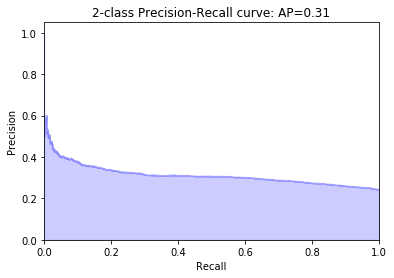

In [28]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_pred_prob)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
plt.show()

### ROC Curve

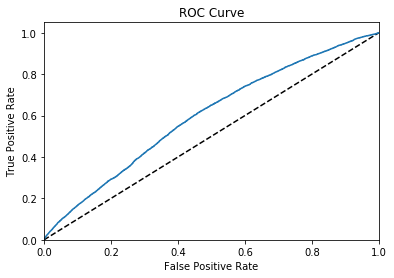

In [30]:
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('ROC Curve')
plt.show()